In [150]:
# # DataFrame.
# import pandas as pd
# pd.options.display.max_columns = None

# # Data Visualization.
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Data Visualization > Maps.
# # import geopandas as gpd

# # Maths.
# import numpy as np
# import scipy.stats as stats
# from scipy.stats import norm

# # Time.
# import datetime as dt

# # Operative System.
# import sys
# import os
# import psutil

# # Machine Learning > sklearn.
# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # Machine Learning > sklearn > Models > Evaluation > Regression.
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Machine Learning > sklearn > Models > Evaluation > Clustering.
# from sklearn.metrics import calinski_harabasz_score


# # Ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# # IPython.
# from IPython.display import clear_output

# # Randomness.
# import random as rn

# from sklearn.pipeline import Pipeline
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import confusion_matrix
# import numpy as np
# from sklearn.impute import SimpleImputer
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# from sklearn.impute import SimpleImputer

# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline

# from sklearn.cluster import DBSCAN
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import OPTICS
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn import tree
# from sklearn.tree import _tree

# clear_output()

In [2]:
# DataFrame.
import pandas as pd
pd.options.display.max_columns = None

# Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization > Maps.
# import geopandas as gpd

# Maths.
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

# Time.
import datetime as dt

# Operative System.
import sys
import os
import psutil

# Machine Learning > sklearn.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Machine Learning > sklearn > Models > Evaluation > Classification. if.
from sklearn.metrics import confusion_matrix

# Machine Learning > sklearn > Models > Evaluation > Regression.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine Learning > sklearn > Models > Clustering. !sklearin_extra!
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# Machine Learning > sklearn > Models > Evaluation > Clustering.
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Machine Learning > sklearn > Models > Trees.
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# IPython.
from IPython.display import clear_output

# Randomness.
import random as rn

# Download files.
import wget


clear_output()


In [4]:
# Carga de los datos desde mi GitHub.
URL = "https://github.com/varo6678/UOC_MasterDS_mineria_PRA2/blob/main/austinHousingData.csv"

RUTA_DESTINO = '.'

# Descargar el archivo
wget.download(URL, RUTA_DESTINO)

HTTPError: HTTP Error 404: Not Found

In [63]:
# Directories.
dir_data = "./data/"
dir_austinHousingData = dir_data + 'austinHousingData.csv'

In [64]:
###############################################################################
# utils.py
###############################################################################

class DataframeOptimizer:
    def __init__(self, df, verbose=True):
        self.df = df
        self.verbose = verbose
        self.original_shape = df.shape

    def reduce_memory(self):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        start_mem = self.df.memory_usage().sum() / 1024**2
        for col in self.df.columns:
            col_type = self.df[col].dtypes
            if col_type in numerics:
                c_min = self.df[col].min()
                c_max = self.df[col].max()
                if str(col_type)[:3] == 'int':
                    self.df[col] = self._cast_to_smallest_int(col, c_min, c_max)
                else:
                    self.df[col] = self._cast_to_smallest_float(col, c_min, c_max)

        end_mem = self.df.memory_usage().sum() / 1024**2
        mem_diff = start_mem - end_mem
        percent_diff = 100 * mem_diff / start_mem

        assert self.df.shape == self.original_shape, \
            "The dimensions of the DataFrame changed after optimization"

        if self.verbose: 
            print('Memory usage before optimization: {:.2f} MB'.format(start_mem))
            print('Memory usage after optimization: {:.2f} MB'.format(end_mem))
            print('Decreased by {:.2f} MB ({:.1f}%)'.format(mem_diff, percent_diff))
        return self.df

    def _cast_to_smallest_int(self, col, c_min, c_max):
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
            return self.df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
            return self.df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            return self.df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
            return self.df[col].astype(np.int64)

    def _cast_to_smallest_float(self, col, c_min, c_max):
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
            return self.df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            return self.df[col].astype(np.float32)
        else:
            return self.df[col].astype(np.float64)

def show_ram_usage():
    py = psutil.Process(os.getpid())
    print('RAM usage: {} GB'.format(py.memory_info()[0]/2. ** 30))

def crear_carpeta_outputs():
    # Obtiene el directorio actual
    directorio_actual = os.getcwd()

    # Define el nombre de la carpeta a crear
    nombre_carpeta = "outputs"

    # Ruta completa de la carpeta a crear
    ruta_carpeta = os.path.join(directorio_actual, nombre_carpeta)

    # Comprueba si la carpeta ya existe
    if not os.path.exists(ruta_carpeta):
        # Crea la carpeta si no existe
        os.makedirs(ruta_carpeta)
        print(f"Se ha creado la carpeta '{nombre_carpeta}' en el directorio actual.")
    else:
        print(f"La carpeta '{nombre_carpeta}' ya existe en el directorio actual.")

###############################################################################

In [65]:
###############################################################################
# main.py
###############################################################################

# Crear carpeta outputs.
crear_carpeta_outputs()

# Cargar los datos.
df_input = pd.read_csv(dir_austinHousingData)

###############################################################################


La carpeta 'outputs' ya existe en el directorio actual.


In [66]:
# Previsualizamos el dataset.
# print(df_input.head())
# Previsualizamos las dimensiones del dataset.
print(df_input.shape)
print(df_input.columns)
# Previsualizamos los tipos de datos del dataset.
print(df_input.dtypes)

(15171, 47)
Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')
zpid                 

In [67]:
###############################################################################
# EDA.py
###############################################################################

###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > tiempo.
###############################################################################

def eda_tiempo(df_input : pd.DataFrame) -> pd.DataFrame:

    """Funcion que ajusta el precio de la vivienda en terminos del tiempo."""

    df_input.rename(columns={'latestPrice':'price'}, inplace=True)
    print("Años de ventas de la Vivienda")
    print(df_input['latest_saleyear'].unique())

    df_input['time_series'] = df_input['latest_salemonth'].apply(lambda x: abs(x-13))

    # Ajuste de precios en terminos del tiempos (House appreciation).
    # Inflacion anual de Austin-Round Rock, TX. Ademas de otros factores.

    # https://www.recenter.tamu.edu/data/housing-activity
    # /#!/activity/MSA/Austin-Round_Rock
    jan2018_to_2019 = .024/12 #2.4%
    jan2019_to_2020 = .037/12 #3.7%
    jan2020_to_2021 = .193/12 #19.3%

    def adjust_price(row):
        if row['latest_saleyear'] == 2018:
            adj_factor = (1+(jan2018_to_2019*row['time_series']))\
                *(1+(jan2019_to_2020*row['time_series']))\
                *(1+(jan2020_to_2021*row['time_series']))
        elif row['latest_saleyear'] == 2019:
            adj_factor = (1+(jan2019_to_2020*row['time_series']))\
                *(1+(jan2020_to_2021*row['time_series']))
        elif row['latest_saleyear'] == 2020:
            adj_factor = (1+(jan2020_to_2021*row['time_series']))
        else: # 2021
            adj_factor = 1
        return int(row['price'] * adj_factor)

    df_input['adj_price'] = df_input.apply(adjust_price, axis=1)

    # Renombrando y ordenando las columnas.
    df_input.rename(
        columns={'price' : 'orig_price', 'adj_price' : 'price'}, inplace=True)
    df_input.set_index('price', inplace=True)
    df_input.reset_index(inplace=True)
    
    return df_input

###############################################################################

###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > duplicidad.
###############################################################################

# check for duplicate data

def eda_duplicados(df_input : pd.DataFrame) -> pd.DataFrame:
    df_input[df_input.duplicated(subset=['latitude','longitude'], keep=False)]\
    .sort_values('latitude')
    return df_input

###############################################################################

###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > Outliers.
###############################################################################

# Tenemos algunos puntos que se pueden considerar outliers. En la zona Sur-Este

def eda_outliers(df_input : pd.DataFrame) -> pd.DataFrame:
    
    """Funcion que elimina los outliers por zona del mapa."""
    # Definir los límites de latitud y longitud para la zona sureste
    lat_limit = 30.12
    lon_limit = -97.95

    # Eliminar los puntos que se encuentran en la zona sureste
    df_input.drop(
        df_input[(df_input['latitude'] < lat_limit) \
        | (df_input['longitude'] < lon_limit)].index, inplace=True)
        
    return df_input

###############################################################################

###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > MissingData.
###############################################################################

def eda_quitar_nulos(df_input : pd.DataFrame) -> pd.DataFrame:
    df_sin_nulos = df_input.dropna()
    print("Se han eliminado las filas con valores nulos del DataFrame.")
    return df_sin_nulos

###############################################################################

###############################################################################
# Preprocesamiento. > Modificacion de variables > Binarizando.
###############################################################################

# df.dtypes

def eda_binarizando(df : pd.DataFrame) -> pd.DataFrame:

    # Lista de características ordinales a convertir
    convert_to_bool = [
        'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
        'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
        'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures']

    # Convierto a binarias.
    for column in convert_to_bool:
        df.loc[df[column] > 0, column] = 1
        df.loc[df[column] != 1, column] = 0

    # Renombro las columnas
    new_column_names = ['accessibility', 'appliances', 'parking', 'patioporch', 'security', 
                        'waterfront', 'windowfeatures', 'community']

    df.rename(columns=dict(zip(convert_to_bool, new_column_names)), inplace=True)

    # Lista de columnas booleanas originales a convertir
    boolean = ['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

    # Convertir columnas booleanas a binarias
    for column in boolean:
        df[column] = df[column].astype(int)

    return df
    
###############################################################################

###############################################################################
# Preprocesamiento. > Eliminando outliers de las colas.
###############################################################################

# Source: https://www.kaggle.com/code/threnjen/ \
# austin-housing-eda-nlp-models-visualizations/notebook

def eda_sin_outliers_colas(df : pd.DataFrame) -> pd.DataFrame:
    def iqr_outliers(columna):
        """Retorna el rango inferior y superior para los datos basado en IQR*1.6"""
        Q1, Q3 = np.percentile(columna, [25, 75])
        iqr = Q3 - Q1
        rango_inferior = Q1 - (1.6 * iqr)
        rango_superior = Q3 + (1.6 * iqr)
        return rango_inferior, rango_superior 

    def asignar_grupo(x, frame, columna):
        return frame.loc[(frame.index == x)][columna][0]

    # Determinando IQR para el tamaño del lote y el área en pies cuadrados
    inferior_lote, superior_lote = iqr_outliers(df.lotSizeSqFt)
    inferior_area, superior_area = iqr_outliers(df.livingAreaSqFt)

    # Eliminando outliers
    df = df[~((df.lotSizeSqFt > superior_lote) | (df.lotSizeSqFt < inferior_lote))]
    df = df[~((df.livingAreaSqFt > superior_area) | (df.livingAreaSqFt < inferior_area))]

    # Imputando el tamaño mediano del lote
    df.loc[
        (df['homeType']=='Condo') \
        | (df['homeType']=='Townhouse') \
        & (df['livingAreaSqFt']<1200) \
        & (df['lotSizeSqFt']>8000), 'lotSizeSqFt'] = df['lotSizeSqFt'].median()

    # Eliminando outliers y entradas basadas en precio y código postal
    df = df[~((df['price']>3000000) | (df['zipcode']==78734) | (df['price'] <= 75000))]

    # Eliminando outliers en base al código postal
    codigos_postales = df['zipcode'].unique()
    for i in codigos_postales:
        inferior, superior = iqr_outliers(df[df['zipcode'] == i]['price'])
        df = df[~(( (df.price > superior) & (df['zipcode'] == i) ) \
                | ( (df.price < inferior)  & (df['zipcode'] == i) ))]

    # Eliminando entradas basadas en el código postal
    df = df[~df['zipcode'].isin([78653, 78738, 78719, 78652, 78742])]

    # Creando nuevas columnas
    df['median_zip'] = df['zipcode'].map(df.groupby('zipcode')['price'].median().round())
    codigos_ordenados = \
        df.groupby('zipcode')['price'].median().sort_values(ascending=True).reset_index()
    codigos_ordenados['rank'] = codigos_ordenados.index + 1
    df['zip_rank'] = df['zipcode'].map(codigos_ordenados.set_index('zipcode')['rank'])

    df['pr_sqft'] = (df['price'] / df['livingAreaSqFt']).round()

    # Eliminando valores irracionalmente altos de pr/sqft
    df = df[df['pr_sqft']<=1000]

    codigos_bajos = df[df['median_zip']<df['price'].mean()]
    codigos_altos = df[df['median_zip']>=df['price'].mean()]

    # Elimino la informacion proporcionada de la vivienda.
    df = df.drop('description', axis=1)

    # Elimino las imagenes del DataFrame, no trabajare con ellas ahora.
    df = df.drop('homeImage', axis=1)

    return df

###############################################################################

# Si nos fijamos, cuando usamos describe. En los valores maximos, encontramos algunos outliers.

print("""

\nEncontramos algunos outliers tanto en describe() como en los histogramas:

\n=> price: unas pocas casas (no se avistaban en el mapa apenas, puntos negros) tenian
    un precio muy alto. En el valor maximo es de 1.555613e+07.

\n=> numOfBathrooms: valor maximo de 27.

\n=> numOfBedrooms: valor maximo de 20.

\n=> garageSpaces: valor maximo de 22.

\n=> parkingSpaces: valor maximo de 22.

\n=> lotSizeSqFt: valor maximo de 1.508483e+09.

\n=> livingAreaSqFt: valor maximo de 109292.

"""
     )

df_input_eda_tiempo = eda_tiempo(df_input)
df_eda_duplicados = eda_duplicados(df_input_eda_tiempo)
df_eda_outliers_mapa = eda_outliers(df_eda_duplicados)
df_eda_sin_nulos = eda_quitar_nulos(df_eda_outliers_mapa)
df_eda_binarizado = eda_binarizando(df_eda_sin_nulos)
df_eda_semi_clean = eda_sin_outliers_colas(df_eda_binarizado)

df = df_eda_semi_clean

# Numero filas del dataset antes de quitar outliers:
num_filas_antes = len(df)
print("Numero filas del dataset antes de quitar outliers:")
print(num_filas_antes)

###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > Outliers > Fix.
###############################################################################

df.sort_values('livingAreaSqFt', ascending=False).head(5)['livingAreaSqFt']
# Dos primeros valores muy altos.

df.sort_values('numOfBathrooms', ascending=False).head(5)['numOfBathrooms']
# Primer valor alto muy fuera de lo comun.

df.sort_values('numOfBathrooms', ascending=True).head(5)['numOfBathrooms']
# Sin banos? Ademas coincide el primero con el primero del area.
# Puede ser un error (aun asi en esta practica lo eliminare.)

df.sort_values('numOfBedrooms', ascending=False).head(5)["numOfBedrooms"]
# Muchas habitaciones para una casa edificada en 1985.

###############################################################################
# livingAreaSqFt alto.
# df.drop(index=[705, 2557], inplace=True) # Dos primeros valores altos.
###############################################################################

###############################################################################
# Banos alto.
df.loc[df.index==2838, 'numOfBathrooms'] = 2.5
###############################################################################

###############################################################################
# Banos iguales a cero.

# Contar el número de filas antes de eliminar
num_filas_antes = len(df)

# Eliminar las filas donde numOfBathrooms es igual a cero
df.drop(df[df['numOfBathrooms'] == 0].index, inplace=True)

# Eliminar las filas donde numOfBedrooms es igual a cero
df.drop(df[df['numOfBedrooms'] == 0].index, inplace=True)

###############################################################################

###############################################################################
# Bedrooms alto.
media_banos = df['numOfBathrooms'].mean()
df.loc[df.index==2838, 'numOfBathrooms'] = round(media_banos, 1)
###############################################################################

###############################################################################
# Finalmente, quiero tener en cuenta solo las casas que pertenecen a la ciudad
# de Austin. Porque otras pueden pertenecer a otros condados, etc.

print(df['city'].value_counts())
df = df[df['city'] == 'austin']

print("Finalmente como unica 'city'")
print(df['city'].unique())

###############################################################################
# Contar el número de filas después de eliminar
num_filas_despues = len(df)

# Calcular el número de eliminaciones realizadas
num_eliminaciones = abs(num_filas_antes - num_filas_despues)

print("\nNumero filas del dataset antes de quitar outliers:")
print(num_filas_antes)
# Numero filas del dataset despues de quitar outliers:
print("\nNumero filas del dataset despues de quitar outliers:")
print(num_filas_despues)

# Imprimir el número de eliminaciones realizadas
print("\nCambios realizados:", num_eliminaciones)
###############################################################################

###############################################################################




Encontramos algunos outliers tanto en describe() como en los histogramas:


=> price: unas pocas casas (no se avistaban en el mapa apenas, puntos negros) tenian
    un precio muy alto. En el valor maximo es de 1.555613e+07.


=> numOfBathrooms: valor maximo de 27.


=> numOfBedrooms: valor maximo de 20.


=> garageSpaces: valor maximo de 22.


=> parkingSpaces: valor maximo de 22.


=> lotSizeSqFt: valor maximo de 1.508483e+09.


=> livingAreaSqFt: valor maximo de 109292.


Años de ventas de la Vivienda
[2019 2020 2018 2021]


Se han eliminado las filas con valores nulos del DataFrame.
Numero filas del dataset antes de quitar outliers:
12891
austin             12686
del valle             76
pflugerville          36
manor                  3
west lake hills        1
Name: city, dtype: int64
Finalmente como unica 'city'
['austin']

Numero filas del dataset antes de quitar outliers:
12891

Numero filas del dataset despues de quitar outliers:
12686

Cambios realizados: 205


In [68]:
###############################################################################
# EDA.py > main
###############################################################################


df_eda_final = eda_quitar_nulos(df_eda_semi_clean)

# DataframeOptimizer(eda_sin_nulos).reduce_memory()

###############################################################################

Se han eliminado las filas con valores nulos del DataFrame.


In [69]:
print(df_eda_final.head())

    price        zpid          city          streetAddress  zipcode  \
0  328625   111373431  pflugerville   14424 Lake Victor Dr    78660   
1  309233   120900430  pflugerville     1104 Strickling Dr    78660   
2  286036  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3  265930   120901374  pflugerville     1025 Strickling Dr    78660   
4  255324    60134862  pflugerville  15005 Donna Jane Loop    78660   

    latitude  longitude  propertyTaxRate  garageSpaces  hasAssociation  \
0  30.430632 -97.663078             1.98             2               1   
1  30.432673 -97.661697             1.98             2               1   
2  30.409748 -97.639771             1.98             0               1   
3  30.432112 -97.661659             1.98             2               1   
4  30.437368 -97.656860             1.98             0               1   

   hasCooling  hasGarage  hasHeating  hasSpa  hasView       homeType  \
0           1          1           1       0        0  S

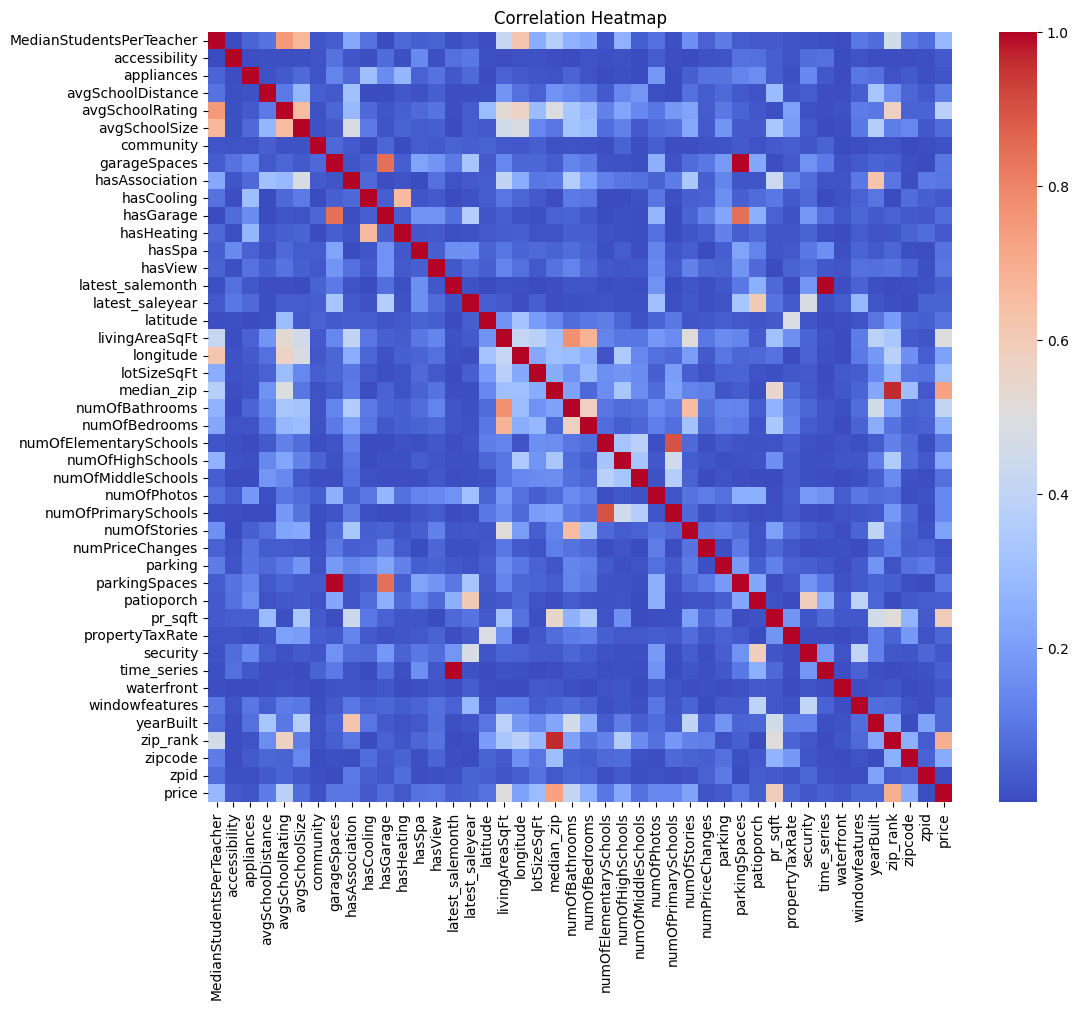

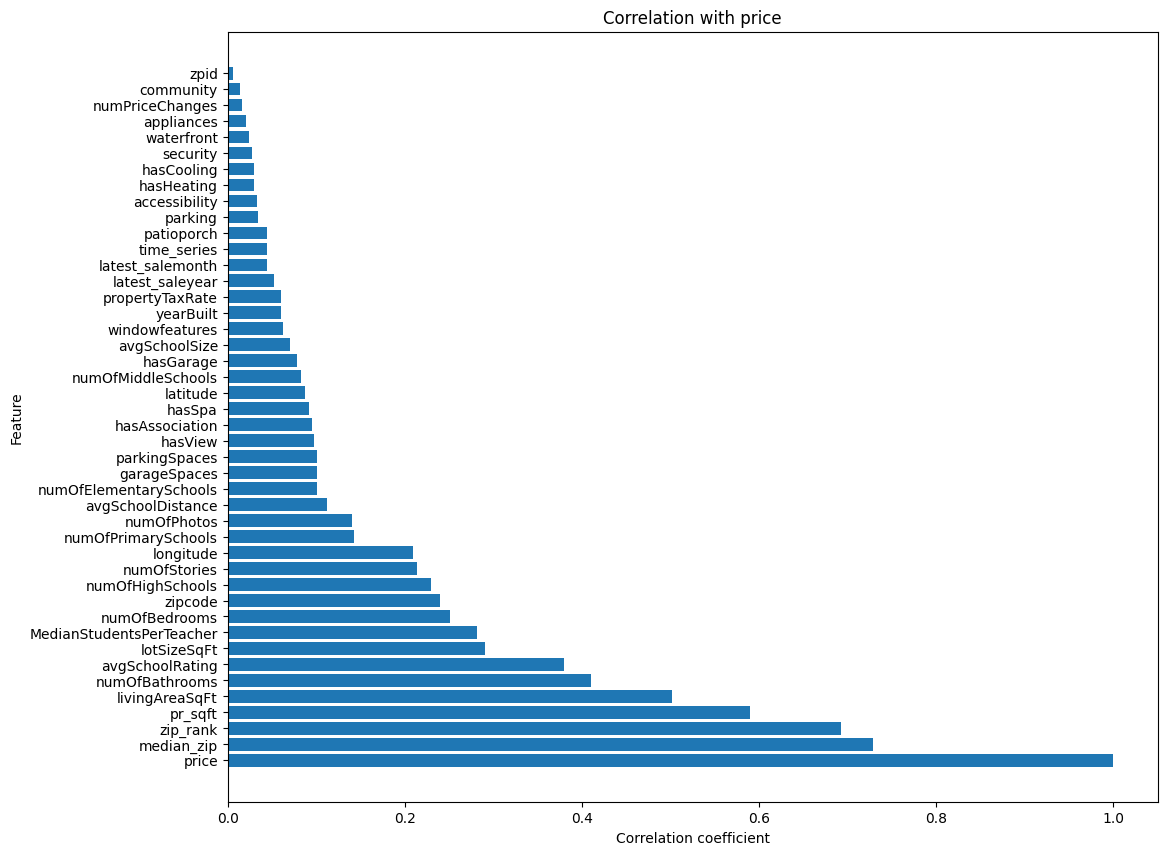

In [70]:
###############################################################################
# Selecion de Features.
###############################################################################

df = df_eda_final

y = pd.DataFrame(df['price'])
X = df.drop('price', axis=1,)
X = X.drop('orig_price', axis=1)

# Normalizamos los datos.
X = (X - X.mean()) / X.std()

corr_matrix = pd.concat([X, y], axis=1).corr().abs()

# Plot de correlaciones en mapa de calor.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Plot en barras.
plt.figure(figsize=(12, 10))
corr_latestPrice = corr_matrix["price"].sort_values(ascending=False)
plt.barh(corr_latestPrice.index, corr_latestPrice)
plt.title("Correlation with price")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.show()

###############################################################################

In [71]:
# Definir un umbral de correlación
correlation_threshold = 0.3

# Seleccionar las características cuya correlación con el precio es mayor que el umbral
highly_correlated_features = corr_latestPrice[corr_latestPrice > correlation_threshold].index

print(highly_correlated_features)

highly_correlated_features

df_seleccionado = df.loc[:, highly_correlated_features]
df_seleccionado

Index(['price', 'median_zip', 'zip_rank', 'pr_sqft', 'livingAreaSqFt',
       'numOfBathrooms', 'avgSchoolRating'],
      dtype='object')


price  median_zip  zip_rank  pr_sqft  livingAreaSqFt  numOfBathrooms  \
0      328625    325080.0         8    126.0          2601.0             3.0   
1      309233    325080.0         8    175.0          1768.0             2.0   
2      286036    325080.0         8    194.0          1478.0             2.0   
3      265930    325080.0         8    158.0          1678.0             2.0   
4      255324    325080.0         8    120.0          2132.0             3.0   
...       ...         ...       ...      ...             ...             ...   
15165  289006    345397.0         9    204.0          1420.0             2.0   
15166  335307    345397.0         9    272.0          1234.0             2.0   
15167  558845    377369.0        13    296.0          1888.0             4.0   
15168  875000    774228.0        37    574.0          1524.0             3.0   
15170  374900    521164.0        23    521.0           720.0             1.0   

       avgSchoolRating  
0             2.666667  
1             2.666667  
2             3.000000  
3             2.666667  
4             4.000000  
...                ...  
15165         5.666667  
15166         3.333333  
15167         6.666667  
15168         5.000000  
15170         6.666667  

[12802 rows x 7 columns]

In [72]:
###############################################################################
# Preprocesamiento. > Analisis Exploratorio de los datos. > MissingData.
###############################################################################

# df.isna().sum() # Para verlo en todas las categorias.
print(f"El numero total de NA en el DataFrame es: {df_seleccionado.isna().sum().sum()}")
###############################################################################

El numero total de NA en el DataFrame es: 0


Antes de empezar es importante tener en cuenta la generacion de numeros aleatorios. Usare mayoritariamente la libreria sklearn de python, esta ubica su generacion en numpy y random.

In [73]:
# Establecer la semilla en NumPy
np.random.seed(13)

# Establecer la semilla en Python
rn.seed(13)

In [108]:
results_clustering = []
results_dbscan_optics= []
results_arboles = [] 

# Ejercicio 1

## KMeans

### Justificacion

- Agrupación de datos: KMeans es un algoritmo de aprendizaje no supervisado utilizado para la agrupación de datos. Si deseas identificar patrones o grupos similares en tu conjunto de datos, KMeans puede ser útil para agrupar las propiedades inmobiliarias en categorías similares en función de las características proporcionadas, como el precio, la mediana del código postal, el rango del código postal, el precio por pie cuadrado, el área habitable y otros atributos.

- Identificación de segmentos de mercado: Al aplicar KMeans, puedes obtener grupos de propiedades que comparten características similares. Estos grupos pueden ayudarte a identificar segmentos de mercado específicos, como propiedades de lujo, propiedades asequibles, propiedades en áreas urbanas o suburbanas, entre otros. Esto puede ser útil para comprender mejor a tus clientes potenciales y adaptar tus estrategias de marketing o toma de decisiones según los diferentes segmentos.

- Análisis exploratorio de datos: Al aplicar KMeans y visualizar los resultados, puedes obtener información valiosa sobre la distribución de tus datos y las relaciones entre las características. Esto te permite realizar un análisis exploratorio de datos más profundo y descubrir patrones o tendencias ocultas en tu conjunto de datos.

- Segmentación de clientes: Si estás trabajando en un contexto de análisis de clientes, KMeans puede ayudarte a segmentar a tus clientes en grupos homogéneos en función de las características proporcionadas. Esto puede ser útil para personalizar tus estrategias de marketing, ofrecer recomendaciones personalizadas o adaptar tus productos o servicios a las necesidades de cada grupo.


### Aplicacion

- Antes de nada, el dataset esta limpio (al menos a mi nivel de entendimiento de Feature Engineering para ese campo), gracias a esto no me debo preocupar por el mal funcionamiento de algunos modulos como los modelos de sklearn. En cualquier caso a modo de 'cura' implemento un SimpleImputer en el pipeline de sklearn. Asi, si los hubiera los sustituye por la mediana.

- Primero, separo del dataset mis labels, estas son numericas continuas, un claro caso de problema de regresion.
  
- Acto seguido, hago una separacion en entrenamiento y test al 20%. Es decir, el entrenamiento sera del 80% de las filas del DataFrame inicial. Quizas seria bueno anadir que como buena practica, seria recomendable que el test fuera del 12.5% al 8.5%, pero entiendo que estoy en una fase de producccion de este codigo.

- Despues escalo los datos, ya que como bien se ve en la tabla de `df_seleccionado`, los numeros ademas de ser bastante dispares, poseen unidades diferentes. Esto ayuda al equilibrio de características, interpretacion de los modelos, rendimiento de los algoritmos y la regularizacion. Todo esto se realiza gracias al pipeline de sklearn.
  
- Ya con los datos transformados, me queda generar, entrenar y evaluar mi modelo.



In [110]:
y = pd.DataFrame(df_seleccionado['price'])
X = df_seleccionado.drop('price', axis=1,)

# # Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con las etapas de transformación
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # en caso de algun NaN.
    ('scaler', StandardScaler())
])

########################################################
# Ajustar y transformar los datos de entrenamiento     #
X_train_transformed = pipeline.fit_transform(X_train)  #
                                                       #
# Ajustar y transformar los datos de prueba            #
X_test_transformed = pipeline.transform(X_test)        # 
########################################################

# Para almacenar los coeficientes de silueta para diferentes números de clusters
silhouette_scores_knn_euclidea = []

# Rango de clusters que quieres probar
range_clusters = [2, 3, 4, 5]

for n_clusters in range_clusters:
    # Crear y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=13)
    kmeans.fit(X_train_transformed)

    # Asignar los clusters
    cluster_labels = kmeans.predict(X_train_transformed)

    # Calcular el coeficiente de silueta y almacenarlo
    silhouette_avg = silhouette_score(X_train_transformed, cluster_labels)
    silhouette_scores_knn_euclidea.append(silhouette_avg)

# Imprimir los coeficientes de silueta para cada número de clusters
for n_clusters, silhouette_avg in zip(range_clusters, silhouette_scores_knn_euclidea):
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta es {silhouette_avg}")


Para n_clusters = 2, el coeficiente de silueta es 0.3550302508034414
Para n_clusters = 3, el coeficiente de silueta es 0.36293111695051905
Para n_clusters = 4, el coeficiente de silueta es 0.28550905445998254
Para n_clusters = 5, el coeficiente de silueta es 0.27546633082984096


In [111]:
# Obtener el valor del coeficiente de silueta más alto y su correspondiente num_clusters
max_silhouette_kmeans_euclidea = round(max(silhouette_scores_knn_euclidea), 2)
max_num_clusters_kmeans_euclidea = range_clusters[silhouette_scores_knn_euclidea.index(max(silhouette_scores_knn_euclidea))]

print(f"El coeficiente de silueta más alto es: {max_silhouette_kmeans_euclidea}")
print(f"El valor de num_clusters correspondiente al coeficiente de silueta más alto es: {max_num_clusters_kmeans_euclidea}")


El coeficiente de silueta más alto es: 0.36
El valor de num_clusters correspondiente al coeficiente de silueta más alto es: 3


In [112]:
results_clustering.append({'Modelo': f'KMeans({max_num_clusters_kmeans_euclidea})', 'Silhouette Coefficient': max_silhouette_kmeans_euclidea})

# Ejercicio 2

## KMeans con distancia de Manhattan

In [113]:
silueta_scores_meoids_manhattan = []

# Bucle para ajustar KMedoids con diferentes números de clusters
for k in range_clusters:
    kmedoids = KMedoids(n_clusters=k, metric='manhattan', random_state=13)
    kmedoids.fit(X_train_transformed)
    clusters = kmedoids.predict(X_train_transformed)
    score = silhouette_score(X_train_transformed, clusters)
    silueta_scores_meoids_manhattan.append(score)

# Imprimir los resultados
for k, score in zip(range_clusters, silueta_scores_meoids_manhattan):
    print(f"Para k={k}, el coeficiente de silueta es: {score}")

Para k=2, el coeficiente de silueta es: 0.32251202081022606
Para k=3, el coeficiente de silueta es: 0.21004597001664946
Para k=4, el coeficiente de silueta es: 0.23182520277939803
Para k=5, el coeficiente de silueta es: 0.24748586278629855


In [114]:
#  Obtener el valor del coeficiente de silueta más alto y su correspondiente num_clusters
max_silhouette_meoids_manhattan = round(max(silueta_scores_meoids_manhattan), 2)
max_num_clusters_meoids_manhattan = range_clusters[silueta_scores_meoids_manhattan.index(max(silueta_scores_meoids_manhattan))]

print(f"El coeficiente de silueta más alto es: {max_silhouette_meoids_manhattan}")
print(f"El valor de num_clusters correspondiente al coeficiente de silueta más alto es: {max_num_clusters_meoids_manhattan}")


El coeficiente de silueta más alto es: 0.32
El valor de num_clusters correspondiente al coeficiente de silueta más alto es: 2


In [115]:
results_clustering.append({'Modelo': f'KMeans({max_num_clusters_meoids_manhattan})', 'Silhouette Coefficient': max_silhouette_meoids_manhattan})

## Comparacion entre KMeans y KMeoids (con diferentes distancia)

In [116]:
df_resultados_clustering = pd.DataFrame(results_clustering)
print(df_resultados_clustering.head())

      Modelo  Silhouette Coefficient
0  KMeans(3)                    0.36
1  KMeans(2)                    0.32


# Ejercicio 3

## DBSCAN 

Density-Based Spatial Clustering of Applications with Noise: agrupa en función de la densidad de los puntos de datos.

In [117]:
# Aplicamos el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train_transformed)

# Obtenemos las etiquetas de los clusters
labels_db = dbscan.labels_

In [118]:
# Prueba con diferentes valores de eps
for eps in [0.3, 0.5, 0.7, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_train_transformed)
    labels_db = dbscan.labels_
    silhouette_score_db = silhouette_score(X_train_transformed, labels_db)
    print(f"Silhouette Score for eps={eps}: {silhouette_score_db}")

Silhouette Score for eps=0.3: -0.1629735233357952
Silhouette Score for eps=0.5: -0.20063302333341332
Silhouette Score for eps=0.7: -0.08109305231402057
Silhouette Score for eps=1.0: 0.24150795623327748


In [119]:
silhouette_score_db = silhouette_score(X_train_transformed, labels_db)
print('DBSCAN Silhouette Score: ', silhouette_score_db)


DBSCAN Silhouette Score:  0.24150795623327748


In [125]:
results_dbscan_optics.append({'Modelo': 'DBSCAN', 'Silhouette Coefficient': silhouette_score_db})

## OPTICS 

Ordering Points To Identify the Clustering Structure: es similar a DBSCAN pero no requiere especificar el parámetro eps, lo que puede ser útil si la densidad de los clusters varía en el conjunto de datos.

In [120]:
optics = OPTICS(min_samples=5)
optics.fit(X_train_transformed)

labels_optics = optics.labels_


In [121]:
silhouette_score_optics = silhouette_score(X_train_transformed, labels_optics)
print('OPTICS Silhouette Score: ', silhouette_score_optics)

OPTICS Silhouette Score:  -0.3037627505440454


In [123]:
results_dbscan_optics.append({'Modelo': 'OPTICS', 'Silhouette Coefficient': silhouette_score_optics})


## Comparacion entre DBSCAN y OPTICS

In [126]:
df_resultados_dbscan_optics = pd.DataFrame(results_dbscan_optics)
print(df_resultados_dbscan_optics.head())

   Modelo  Silhouette Coefficient
0  OPTICS               -0.303763
1  DBSCAN                0.241508


# Ejercicio 4

## DecisionTreeRegressor

Mean Squared Error: 550316587.7828974


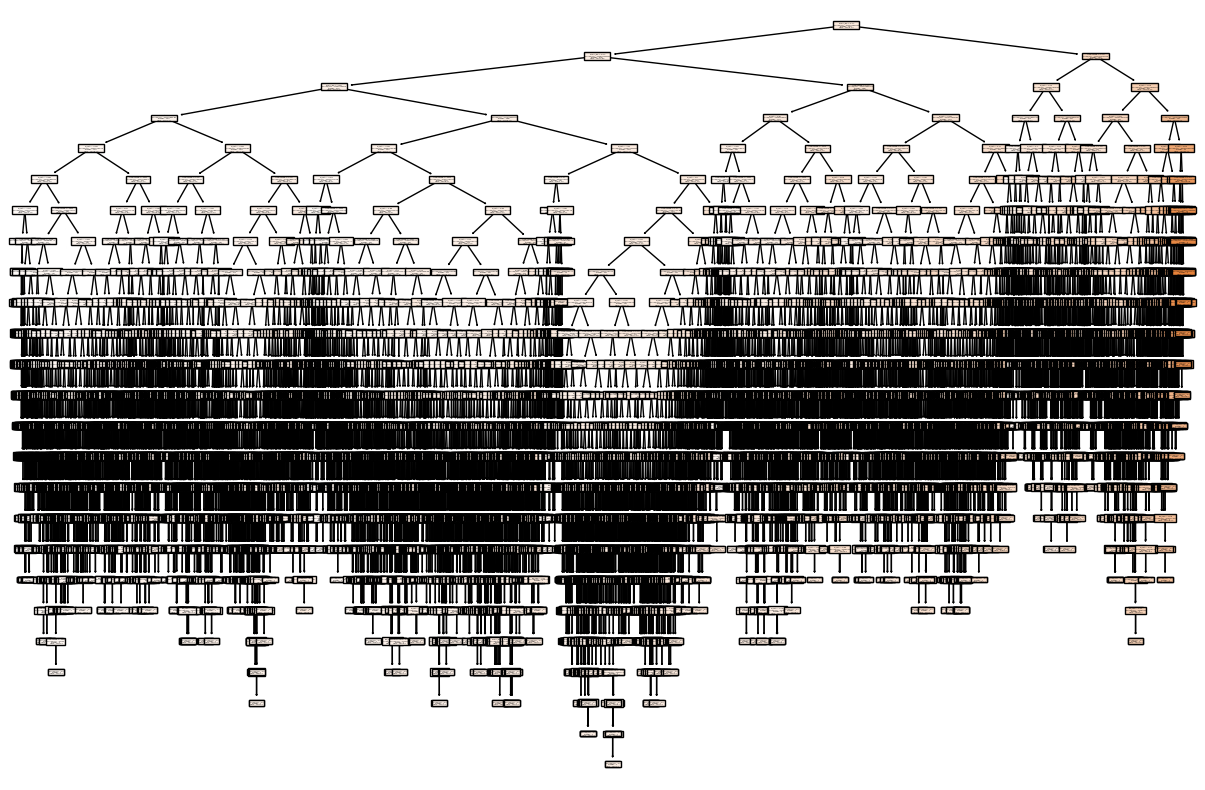

In [127]:
# Crear y entrenar el árbol de regresión
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_transformed, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = regressor.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizar el árbol
plt.figure(figsize=(15,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()


In [128]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

# Usar la función
tree_to_code(regressor, X.columns)

  if median_zip <= 0.9838791191577911:
    if median_zip <= 0.049484387040138245:
      if median_zip <= -0.6970034241676331:
        if livingAreaSqFt <= -0.3824220299720764:
          if pr_sqft <= -0.4419776648283005:
            if pr_sqft <= -0.9075281620025635:
              if pr_sqft <= -1.2178952097892761:
                if livingAreaSqFt <= -0.8077381551265717:
                  if pr_sqft <= -1.5498154163360596:
                    if livingAreaSqFt <= -1.0625265836715698:
                      return [[75609.]]
                    else:  # if livingAreaSqFt > -1.0625265836715698
                      return [[88707.]]
                  else:  # if pr_sqft > -1.5498154163360596
                    if livingAreaSqFt <= -1.3286835551261902:
                      return [[100037.]]
                    else:  # if livingAreaSqFt > -1.3286835551261902
                      if pr_sqft <= -1.3342828154563904:
                        if median_zip <= -1.0737970471382141:
          

In [129]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")



Mean Absolute Error: 12268.90042951972
R^2 Score: 0.9905116960594322


In [132]:
# Guardar los resultados en la lista de resultados de arboles.
results_arboles.append({'Modelo': 'Decision Tree', 'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2})

## DecisionTreeRegressor (podado/pruned)

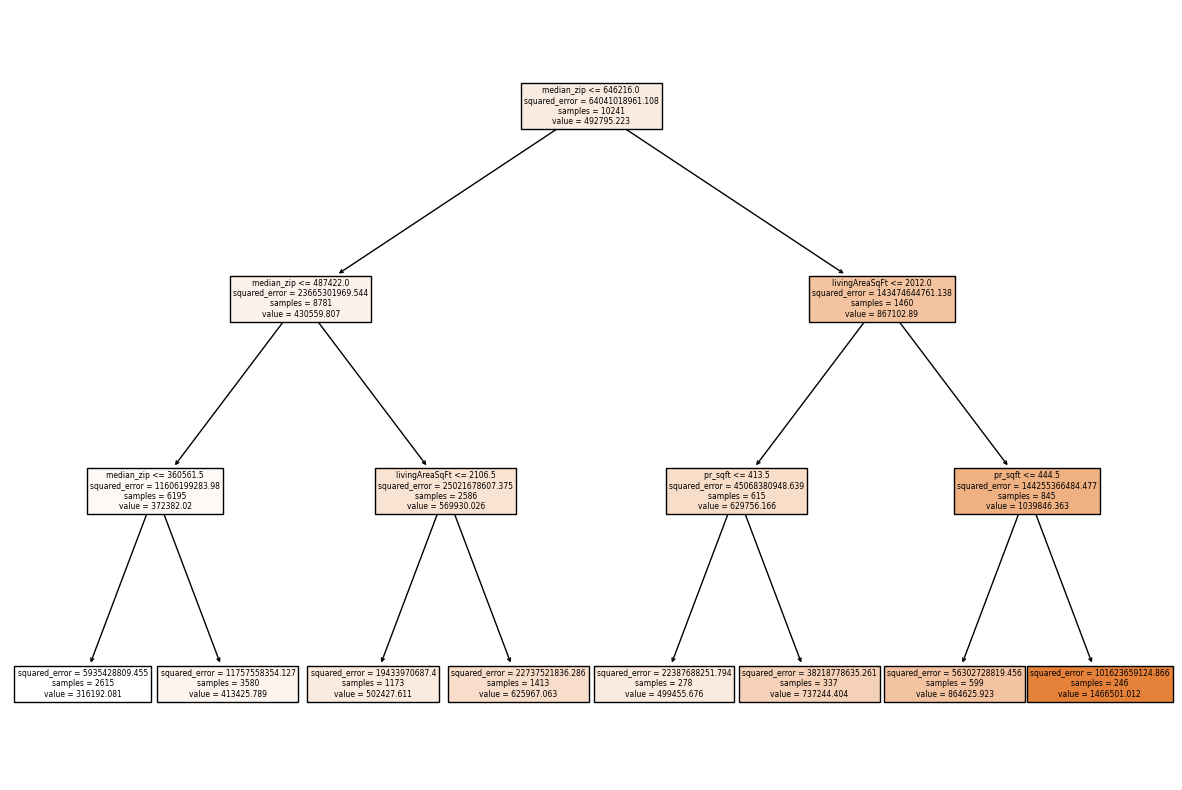

  if median_zip <= 646216.0:
    if median_zip <= 487422.0:
      if median_zip <= 360561.5:
        return [[316192.08068834]]
      else:  # if median_zip > 360561.5
        return [[413425.78854749]]
    else:  # if median_zip > 487422.0
      if livingAreaSqFt <= 2106.5:
        return [[502427.6112532]]
      else:  # if livingAreaSqFt > 2106.5
        return [[625967.06298655]]
  else:  # if median_zip > 646216.0
    if livingAreaSqFt <= 2012.0:
      if pr_sqft <= 413.5:
        return [[499455.67625899]]
      else:  # if pr_sqft > 413.5
        return [[737244.40356083]]
    else:  # if livingAreaSqFt > 2012.0
      if pr_sqft <= 444.5:
        return [[864625.92320534]]
      else:  # if pr_sqft > 444.5
        return [[1466501.01219512]]


In [133]:
# Poda del árbol
regressor_pruned = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor_pruned.fit(X_train, y_train)

# Predecir y evaluar
y_pred_pruned = regressor_pruned.predict(X_test)

# Visualizar el árbol podado
plt.figure(figsize=(15,10))
tree.plot_tree(regressor_pruned, filled=True, feature_names=X.columns)
plt.show()

# Reglas del árbol podado
tree_to_code(regressor_pruned, X.columns)


In [134]:
def seguir_camino(ejemplo):
    if ejemplo['median_zip'] <= 646216.0:
        if ejemplo['median_zip'] <= 444591.5:
            if ejemplo['median_zip'] <= 360561.5:
                return 'La predicción es 316117.46318199'
            else:  # if median_zip > 360561.5
                return 'La predicción es 399607.52783726'
        else:  # if median_zip > 444591.5
            if ejemplo['livingAreaSqFt'] <= 1995.5:
                return 'La predicción es 468393.79717931'
            else:  # if livingAreaSqFt > 1995.5
                return 'La predicción es 598144.86666667'
    else:  # if median_zip > 646216.0
        if ejemplo['livingAreaSqFt'] <= 2003.0:
            if ejemplo['pr_sqft'] <= 382.5:
                return 'La predicción es 458979.68544601'
            else:  # if pr_sqft > 382.5
                return 'La predicción es 716473.24570025'
        else:  # if livingAreaSqFt > 2003.0
            if ejemplo['pr_sqft'] <= 438.0:
                return 'La predicción es 863979.67839196'
            else:  # if pr_sqft > 438.0
                return 'La predicción es 1441549.11290323'

# Test de la función
ejemplo = {'median_zip': 650000, 'livingAreaSqFt': 2000, 'pr_sqft': 400}
print(seguir_camino(ejemplo))

La predicción es 716473.24570025


In [135]:
from sklearn.metrics import mean_absolute_error

# Predecir y evaluar el árbol original
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (original): {mae}")

# Predecir y evaluar el árbol podado
y_pred_pruned = regressor_pruned.predict(X_test)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
print(f"Mean Absolute Error (pruned): {mae_pruned}")


Mean Absolute Error (original): 1801005.2522452166
Mean Absolute Error (pruned): 99264.15889113801


In [136]:
# Guardar los resultados en la lista de resultados de arboles.
results_arboles.append({'Modelo': 'Decision Tree Pruned', 'Mean Squared Error': mse, 'Mean Absolute Error': mae_pruned, 'R^2 Score': r2})

# Ejercicio 5

## Gradient Boosting Regressor

**Gradient Boosting Regressor:**

El Gradient Boosting Regressor es un algoritmo de aprendizaje automático que se utiliza para problemas de regresión. Combina múltiples árboles de decisión débiles para construir un modelo de regresión más fuerte. En lugar de construir cada árbol de forma independiente, el Gradient Boosting Regressor los construye de manera secuencial, donde cada árbol se enfoca en corregir los errores residuales cometidos por los árboles anteriores. Esto se logra ajustando los pesos de los datos y minimizando una función de pérdida, como el error cuadrado medio (MSE) o la desviación absoluta media (MAE).

El Gradient Boosting Regressor tiene varias ventajas:

- Puede capturar relaciones no lineales y complejas entre las características y la variable objetivo.
- Es más resistente al sobreajuste en comparación con un árbol de decisión único.
- Puede manejar datos faltantes automáticamente.
- Puede manejar características numéricas y categóricas sin necesidad de preprocesamiento adicional.

**Decision Tree Regressor:**

El Decision Tree Regressor es un algoritmo de aprendizaje automático utilizado para problemas de regresión. Crea un árbol de decisión en el que cada nodo interno representa una característica o atributo, cada rama representa una regla de decisión y cada hoja representa una predicción. El árbol se construye dividiendo repetidamente los datos en función de las características seleccionadas, de modo que se minimice la varianza o el error cuadrado medio en cada división.

Algunas consideraciones sobre el Decision Tree Regressor:

- Los árboles de decisión son fáciles de interpretar y visualizar, lo que puede ayudar a comprender el proceso de toma de decisiones del modelo.
- Pueden manejar características numéricas y categóricas sin necesidad de preprocesamiento adicional.
- Los árboles de decisión tienden a ser más propensos al sobreajuste, especialmente cuando se construyen árboles profundos.

**Comparación entre Gradient Boosting Regressor y Decision Tree Regressor:**

- El Gradient Boosting Regressor combina múltiples árboles débiles para obtener un modelo más fuerte, mientras que el Decision Tree Regressor construye un solo árbol.
- El Gradient Boosting Regressor puede manejar datos faltantes y características numéricas y categóricas sin preprocesamiento adicional, mientras que el Decision Tree Regressor también puede manejar características numéricas y categóricas, pero puede requerir cierto preprocesamiento.
- El Gradient Boosting Regressor tiende a ser más resistente al sobreajuste que un árbol de decisión único.
- Los árboles de decisión son más fáciles de interpretar y visualizar en comparación con el Gradient Boosting Regressor.

In [141]:
# Definir los parámetros para la búsqueda en malla
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']
}

# Crear el objeto GridSearchCV
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
gbr_grid.fit(X_train_transformed, y_train)

clear_output()


/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [151]:
# Imprimir los mejores parámetros
print(gbr_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [142]:

# Mejores parametros.
best_params = gbr_grid.best_params_
gbr_mejores_parametros = GradientBoostingRegressor(**best_params, random_state=42)


# Entrenar el modelo de Gradient Boosting
gbr_mejores_parametros.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred_gbr = gbr_mejores_parametros.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Mean Squared Error (Gradient Boosting): {mse_gbr}")


# Calcular el MAE
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"Mean Absolute Error (Gradient Boosting): {mae_gbr}")

# Calcular el R^2
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"R^2 (Gradient Boosting): {r2_gbr}")


Mean Squared Error (Gradient Boosting): 123201647.45391467
Mean Absolute Error (Gradient Boosting): 7453.49447795931
R^2 (Gradient Boosting): 0.9978758142077255


In [143]:
# Guardar los resultados en la lista de resultados de arboles..
results_arboles.append({'Modelo': 'Gradient Boosting', 'Mean Squared Error': mse_gbr, 'Mean Absolute Error': mae_gbr, 'R^2 Score': r2_gbr})

## RandomForestRegressor

In [153]:
# Definir los parámetros para la búsqueda en malla
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000], # aumentar el rango de n_estimators
    'max_depth': [None, 2, 4, 6, 8, 10], # aumentar el rango y añadir None para máxima profundidad
    'min_samples_split': [2, 5, 10], # disminuir el rango para explorar más
    'min_samples_leaf': [1, 2, 4], # disminuir el rango para explorar más
    'max_features': ['auto', 'sqrt', 'log2'], # estos son suficientes por ahora
    'bootstrap': [True, False] # añadir bootstrap para explorar ambos escenarios
}

# Crear el objeto GridSearchCV
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo a los datos
rf_grid.fit(X_train_transformed, y_train)

clear_output()

/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/ramanujan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ramanujan/.local/lib/python3.10/site-pa

KeyboardInterrupt: 

In [ ]:
# Imprimir los mejores parámetros
print(rf_grid.best_params_)

# Mejores parámetros
best_params = rf_grid.best_params_
rf_mejores_parametros = RandomForestRegressor(**best_params, random_state=42)

# Entrenar el modelo de RandomForestRegressor
rf_mejores_parametros.fit(X_train, y_train)

In [ ]:
# Realizar predicciones y evaluar el modelo
y_pred_rf = rf_mejores_parametros.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")

# Calcular el MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (Random Forest): {mae_rf}")

# Calcular el R^2
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R^2 Score (Random Forest): {r2_rf}")

# Guardar los resultados en la lista de resultados de árboles
results_arboles.append({'Modelo': 'Random Forest', 'Mean Squared Error': mse_rf, 'Mean Absolute Error': mae_rf, 'R^2 Score': r2_rf})

In [147]:
# Crear un DataFrame con los resultados de los modelos de árboles.
df_resultados_arboles = pd.DataFrame(results_arboles)
print(df_resultados_arboles)

                 Modelo  Mean Squared Error  Mean Absolute Error  R^2 Score
0         Decision Tree        5.503166e+08         1.801005e+06   0.990512
1  Decision Tree Pruned        5.503166e+08         9.926416e+04   0.990512
2     Gradient Boosting        1.232016e+08         7.453494e+03   0.997876


Los modelos evaluados son:
- Decision Tree (Árbol de Decisión)
- Decision Tree Pruned (Árbol de Decisión podado)
- Gradient Boosting.

Las metricas de evaluacion seleccionadas al ser un problema de regresion son:
- Mean Squared Error (MSE): El MSE es una métrica que mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un valor más bajo de MSE indica que el modelo tiene una mejor capacidad para predecir los valores reales. En este caso, el Decision Tree y el Decision Tree Pruned tienen el mismo valor de MSE, mientras que el Gradient Boosting tiene un MSE más bajo.

- Mean Absolute Error (MAE): El MAE es una métrica que mide el promedio de los errores absolutos entre las predicciones del modelo y los valores reales. Al igual que el MSE, un valor más bajo de MAE indica una mejor capacidad de predicción del modelo. Aquí, el Decision Tree Pruned tiene un MAE considerablemente más bajo que el Decision Tree y el Gradient Boosting, lo que sugiere que es capaz de realizar predicciones más precisas en términos de magnitud de errores.

- R^2 Score: El R^2 Score, también conocido como coeficiente de determinación, es una métrica que proporciona una medida de la bondad de ajuste del modelo. Toma valores entre 0 y 1, donde 1 indica un ajuste perfecto. Aquí, todos los modelos tienen valores altos de R^2 Score, lo que significa que explican una gran proporción de la variabilidad de los datos.
  

> En general, los resultados indican que el modelo Gradient Boosting tiene un rendimiento ligeramente mejor en términos de MSE y MAE en comparación con los modelos Decision Tree y Decision Tree Pruned. Además, todos los modelos muestran un ajuste muy bueno a los datos, ya que tienen valores altos de R^2 Score, lo que sugiere que son capaces de explicar una gran parte de la variabilidad en los datos objetivo.

## Comparativas finales

In [149]:
print()
# print de los resultados del dataframe de resultados de clustering.
print(df_resultados_clustering)
print()
# print de los resultados del dataframe de resultados de DBSCAN y OPTICS.
print(df_resultados_dbscan_optics)
# print de los resultados del dataframe de resultados de arboles.
print()
print(df_resultados_arboles)
print()


      Modelo  Silhouette Coefficient
0  KMeans(3)                    0.36
1  KMeans(2)                    0.32

   Modelo  Silhouette Coefficient
0  OPTICS               -0.303763
1  DBSCAN                0.241508

                 Modelo  Mean Squared Error  Mean Absolute Error  R^2 Score
0         Decision Tree        5.503166e+08         1.801005e+06   0.990512
1  Decision Tree Pruned        5.503166e+08         9.926416e+04   0.990512
2     Gradient Boosting        1.232016e+08         7.453494e+03   0.997876



# Ejercicio 6

## Limitaciones de los datos:

- Ausencia de características importantes: Puede ser que los datos no contengan suficientes variables predictivas o que falten variables que sean importantes para la predicción. Esto limitaría la capacidad del modelo para hacer predicciones precisas.

- Valores faltantes: Si hay muchos valores faltantes en los datos, esto podría afectar la precisión del modelo. En el caso del aprendizaje no supervisado, el tratamiento de los valores faltantes es especialmente crítico ya que estos modelos intentan identificar patrones en los datos.

- Sesgo en los datos: Si los datos recogidos están sesgados de alguna manera (por ejemplo, si se recogen de una población no representativa), esto podría sesgar también las predicciones del modelo.

- Alta dimensionalidad: Con demasiadas características, los modelos pueden tener dificultades para encontrar patrones y pueden volverse propensos a sobreajustar. Este es un problema especialmente común en el aprendizaje no supervisado, donde no tenemos un objetivo claro para ayudar a orientar el modelo.

- Outliers: Los valores atípicos pueden afectar la capacidad de los modelos para aprender correctamente los patrones en los datos, especialmente si no se manejan correctamente.

## Riesgos del uso del modelo:

- Sobreajuste: Si un modelo se ajusta demasiado a los datos de entrenamiento, puede funcionar mal en datos nuevos e invisibles. Este es un riesgo constante con los modelos de aprendizaje automático, y puede llevar a una confianza excesiva en la precisión del modelo.

- Predicciones erróneas: Dependiendo de la aplicación, las predicciones incorrectas pueden tener consecuencias graves. Por ejemplo, si estamos usando este modelo para determinar los precios de las viviendas, las predicciones incorrectas pueden resultar en pérdidas financieras significativas.

- Sesgo y justicia: Si los datos de entrenamiento están sesgados, los modelos pueden aprender y perpetuar estos sesgos. Esto puede llevar a resultados injustos o discriminatorios.

- Interpretabilidad y transparencia: Especialmente con modelos más complejos, puede ser difícil entender cómo están tomando decisiones. Esto puede hacer que sea difícil detectar problemas o sesgos en el modelo, y también puede causar problemas si las personas no confían en las decisiones tomadas por el modelo.

- Privacidad y seguridad de los datos: Si los datos utilizados para entrenar el modelo contienen información sensible, hay riesgos de privacidad y seguridad que deben ser considerados. Además, si los modelos se utilizan para tomar decisiones que afectan a las personas, deben ponerse en práctica salvaguardas para proteger sus derechos.
